In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib  inline
plt.rcParams['figure.figsize']= 10,8
plt.style.use('seaborn')

<ipython-input-3-8b61d306809c>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving bankloans.csv to bankloans.csv


In [ ]:
import io

# Assuming you've uploaded a file named 'bankloan.csv'
# Fetch the file name dynamically from the uploaded dictionary
filename = next(iter(uploaded))

# Convert the uploaded file into a pandas DataFrame
bankloans= pd.read_csv(io.BytesIO(uploaded[filename]))

In [ ]:
bankloans.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [ ]:
bankloans.isnull().any()

,0
age,False
ed,False
employ,False
address,False
income,False
debtinc,False
creddebt,False
othdebt,False
default,True


In [ ]:
bankloans.isnull().sum()

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,150


In [ ]:
numeric_columns=bankloans.select_dtypes(include=['number']).columns.tolist()

NameError: name 'bankloans' is not defined

In [ ]:
print("Numeric Columns:", numeric_columns)

Numeric Columns: ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']


In [ ]:
numeric_val_columns = [key for key in dict(bankloans.dtypes)  if dict(bankloans.dtypes)[key] in ['float64','float32', 'int64','int32']  ]

In [ ]:
numeric_val_columns

['age',
 'ed',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'default']

In [ ]:
catgorical_var_names = [key for key in dict(bankloans.dtypes) if dict(bankloans.dtypes)[key] in ['object']]
catgorical_var_names



AttributeError: 'DataFrame' object has no attribute 'deafault'

In [ ]:
bankloans_old= bankloans.loc[bankloans.default.isnull()==0]

In [ ]:
bankloans_new = bankloans.loc[bankloans.default.isnull()==1]

In [ ]:
bankloans_old.describe(percentiles=[0.25,0.5,0.75,0.8,0.9])

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
80%,41.200000,2.000000,14.000000,14.000000,61.000000,15.440000,2.288026,4.577926,1.000000
90%,46.000000,3.000000,18.000000,18.000000,82.000000,19.610000,3.621504,7.036180,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


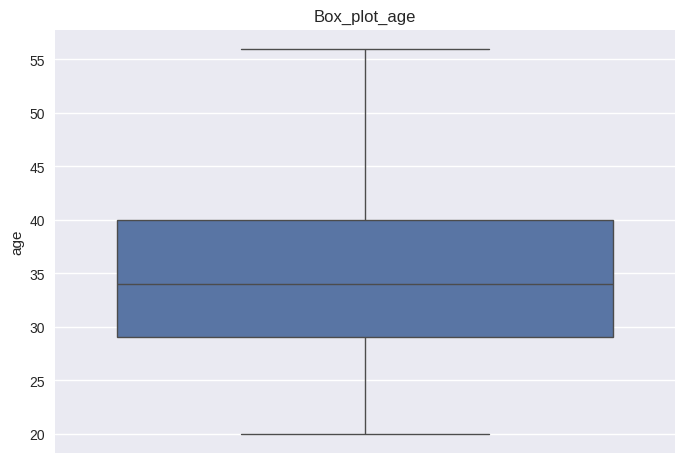

In [ ]:
sns.boxplot(y="age",data=bankloans_old)
plt.title("Box_plot_age")
plt.show()

In [ ]:
def outlier_capping(x):
  x = x.clip(upper=x.quantile(0.95))
  return(x)

In [ ]:
bankloans_old= bankloans_old.apply(lambda x :outlier_capping(x))

In [ ]:
bankloans_old.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.008057,0.552529,0.592888,0.547307,0.003379,0.287643,0.358893,-0.148576
ed,0.008057,1.000000,-0.151137,0.048715,0.214712,0.011959,0.118314,0.144466,0.118521
employ,0.552529,-0.151137,1.000000,0.346075,0.693991,-0.052125,0.367140,0.411136,-0.296916
address,0.592888,0.048715,0.346075,1.000000,0.336331,-0.028549,0.178272,0.203787,-0.167691
income,0.547307,0.214712,0.693991,0.336331,1.000000,-0.024923,0.538286,0.612735,-0.124510
debtinc,0.003379,0.011959,-0.052125,-0.028549,-0.024923,1.000000,0.565627,0.631113,0.380675
creddebt,0.287643,0.118314,0.367140,0.178272,0.538286,0.565627,1.000000,0.635517,0.220331
othdebt,0.358893,0.144466,0.411136,0.203787,0.612735,0.631113,0.635517,1.000000,0.125373
default,-0.148576,0.118521,-0.296916,-0.167691,-0.124510,0.380675,0.220331,0.125373,1.000000


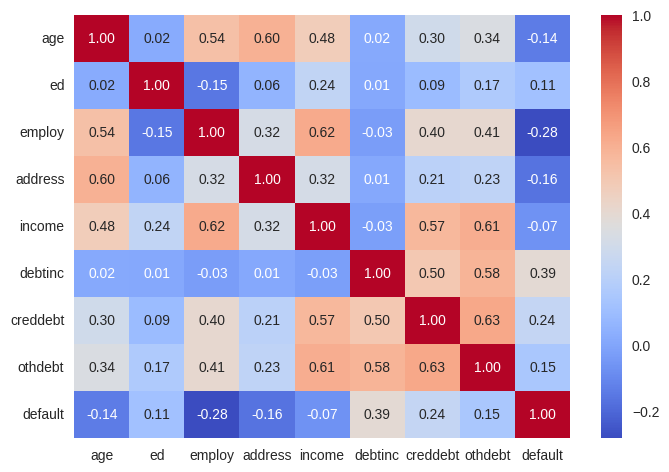

,count
default,
0.0,517
1.0,183


In [ ]:
sns.heatmap(bankloans_old.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()
bankloans_old['default'].value_counts()

In [ ]:
tstats_df = pd.dataframe()

for eachvariable in numeric_var_names:
    tstats = stats.ttest_ind(bankloans_old.loc[bankloans_old["default"] == 1,eachvariable],bankloans_old.loc[bankloans_old["default"] == 0, eachvariable],equal_var=False)
 temp = pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
     tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

tstats_df =  tstats_df.sort_values(by = "P-Value").reset_index(drop = True)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [ ]:
feature_columns = bankloans_old.columns.difference(['default'])
feature_columns

Index(['address', 'age', 'creddebt', 'debtinc', 'ed', 'employ', 'income',
       'othdebt'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(bankloans_old[feature_columns],
                                                 bankloans_old['default'], stratify = bankloans_old['default'], test_size = 0.2, random_state = 123)

In [ ]:
## Model Building

logreg = LogisticRegression()
logreg.fit(train_X,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Predicting the test cases
bankloans_test_pred_log = pd.DataFrame({'actual':test_y, 'predicted': logreg.predict(test_X)})
bankloans_test_pred_log = bankloans_test_pred_log.reset_index()
bankloans_test_pred_log.head()

,index,actual,predicted
0,145,0.0,0.0
1,526,0.0,0.0
2,689,0.0,0.0
3,430,1.0,1.0
4,245,0.0,0.0


In [ ]:
logreg = LogisticRegression()
logreg.fit(train_X,train_y)

In [ ]:
bankloans_test_pred_log = pd.DataFrame({'actual':test_y,'predicted': logreg.predict(test_X)})
bankloans_test_pred_log =bankloans_test_pred_log.reset_index()

In [ ]:
cm_logreg = metrics.confusion_matrix(bankloans_test_pred_log.actual,bankloans_test_pred_log.predicted,labels = [1,0])
cm_logreg

array([[19, 18],
       [11, 92]])

In [ ]:
sns.heatmap = (cm_logreg,annot= True, fmt=".2f",cmap="coolwarm",xticklabel = ["Default","Non Default"], yticklabel = ["Default","Non Default"])
plt.title()

In [ ]:
prec_score = metrics.precision_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.predicted)
print("Precision score :", round(prec_score,3))

Precision score : 0.633


In [ ]:
print(metrics.classification_report(bankloans_test_pred_log.actual, bankloans_test_pred_log.predicted))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       103
         1.0       0.63      0.51      0.57        37

    accuracy                           0.79       140
   macro avg       0.73      0.70      0.72       140
weighted avg       0.78      0.79      0.79       140



In [ ]:
predict_prob_df = pd.DataFrame(logreg.predict_proba(test_X))
predict_prob_df.head()

NameError: name 'pd' is not defined

In [ ]:
bankloans_test_prob_log = pd.concat([bankloans_test_pred_log,predict_prob_df], axis =1)
bankloans_test_prob_log.columns = ['index','actual','predicted','default_0','default_1']

In [ ]:
Bankloans_test_prob_log = metrics.auc_score(bankloans_test_prob_log.actual,)

In [ ]:
plt.plot(fpr,tpr, label = 'ROC curve (area = %0.2f)' % auc_score)

In [ ]:
i = np.arrange(len(tpr))
roc_like_df = pd.DataFrame({'falsepositiverate':pd.series(fpr,index = i),
                            'sensitivity' : pd.Series(tpr,index=i),'specificity' : pd.series(1-fpr,index =i),'cutoff': pd.Series(thresholds,index=i })
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
ro_like_df[roc_like_df['total']==roc_like_df['total'].max()    ]

In [ ]:
bankloans_test_pred_log['new_labels'] = bankloans_test_pred_log['default'].map (lambda x:1 if x>0.224326 else 0)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# Define the pipeline
pipelines = {
    "dtclass": make_pipeline(DecisionTreeClassifier(random_state=100))
}


In [ ]:
#To check the accuracy of the pipeline
scores = cross_validate(pipelines['dtclass'],train_X,train_y,return_train_score=True)
scores['test_score'].mean()

0.6982142857142858

In [ ]:
pipelines['dtclass'].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [ ]:
decisiontree_hyperparameters = {'decisiontreeclassififer_max_depth' : np.arrange(3,10), }

In [ ]:
train_direct = pd.Dataframe({'actual':train_y.reset_index(drop=true),'prob': pd.DataFrame(logreg.predict_proba(test_X))[1]})